In [119]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python library for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - library to plot graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


In [120]:
#read the twitter config file. Upload your own twitter developer credentials.
config = pd.read_csv("twitter_config.csv")

# Variables that contains the credentials to access Twitter API
twitter_key = config['twitter_key'][0]
twitter_secret = config['twitter_secret'][0]
twitter_access_token = config['twitter_access_token'][0]
twitter_access_token_secret = config['twitter_access_token_secret'][0]

# Setup access to API
auth = tweepy.OAuthHandler(twitter_key, twitter_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)


# Create API object
auth = tweepy.OAuthHandler(twitter_key, twitter_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
twitterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [121]:
twitterAccount = "ChannelNewsAsia"

In [122]:
tweets = tweepy.Cursor(twitterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

In [123]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [124]:
df.head()

,Tweet
0,"Bradman's 'baggy green' sold for AUS$450,000 h..."
1,Poland eyes hard split with coal https://t.co/...
2,Boba Fett to get standalone Star Wars spinoff ...
3,‘It’s just a song I love’: Ed Sheeran surprise...
4,Former Japan PM Shinzo Abe questioned by prose...


In [125]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [126]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [127]:
#functions to calculate the subjectivity and polarity of the tweets.
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [128]:
#apply functions to the data frame and create two new columns for Subjectivity and Polarity.
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [129]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,"Bradman's 'baggy green' sold for AUS$450,000",0.300000,-0.200000
1,Poland eyes hard split with coal,0.541667,-0.291667
2,Boba Fett to get standalone Star Wars spinoff ...,0.000000,0.000000
3,‘It’s just a song I love’: Ed Sheeran surprise...,0.527273,0.318182
4,Former Japan PM Shinzo Abe questioned by prose...,0.000000,0.000000
5,From Crash Landing On You to The Crown: 2020’s...,0.500000,0.500000
6,Hong Kong activist Nathan Law seeking asylum i...,0.000000,0.000000
7,Malaysia PM Muhyiddin to be among the first in...,0.333333,0.250000
8,Al Jazeera journalists targeted by spyware: Wa...,0.000000,0.000000
9,Shang-Chi actor Simu Liu criticised for deleti...,0.200000,0.100000


In [130]:
#remove empty rows
df = df.drop(df[df['Tweet'] == ''].index)

In [131]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,"Bradman's 'baggy green' sold for AUS$450,000",0.300000,-0.200000
1,Poland eyes hard split with coal,0.541667,-0.291667
2,Boba Fett to get standalone Star Wars spinoff ...,0.000000,0.000000
3,‘It’s just a song I love’: Ed Sheeran surprise...,0.527273,0.318182
4,Former Japan PM Shinzo Abe questioned by prose...,0.000000,0.000000
5,From Crash Landing On You to The Crown: 2020’s...,0.500000,0.500000
6,Hong Kong activist Nathan Law seeking asylum i...,0.000000,0.000000
7,Malaysia PM Muhyiddin to be among the first in...,0.333333,0.250000
8,Al Jazeera journalists targeted by spyware: Wa...,0.000000,0.000000
9,Shang-Chi actor Simu Liu criticised for deleti...,0.200000,0.100000


In [132]:
#a function to categorize tweets as Negative, Neutral and Positive.
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [133]:
# apply this function and create a Score column in the dataframe.
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [134]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,"Bradman's 'baggy green' sold for AUS$450,000",0.300000,-0.200000,Negative
1,Poland eyes hard split with coal,0.541667,-0.291667,Negative
2,Boba Fett to get standalone Star Wars spinoff ...,0.000000,0.000000,Neutral
3,‘It’s just a song I love’: Ed Sheeran surprise...,0.527273,0.318182,Positive
4,Former Japan PM Shinzo Abe questioned by prose...,0.000000,0.000000,Neutral
5,From Crash Landing On You to The Crown: 2020’s...,0.500000,0.500000,Positive
6,Hong Kong activist Nathan Law seeking asylum i...,0.000000,0.000000,Neutral
7,Malaysia PM Muhyiddin to be among the first in...,0.333333,0.250000,Positive
8,Al Jazeera journalists targeted by spyware: Wa...,0.000000,0.000000,Neutral
9,Shang-Chi actor Simu Liu criticised for deleti...,0.200000,0.100000,Positive


In [135]:
# calculate the percentage of positive tweets from all the tweets in the dataframe.
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

40.0 % of positive tweets


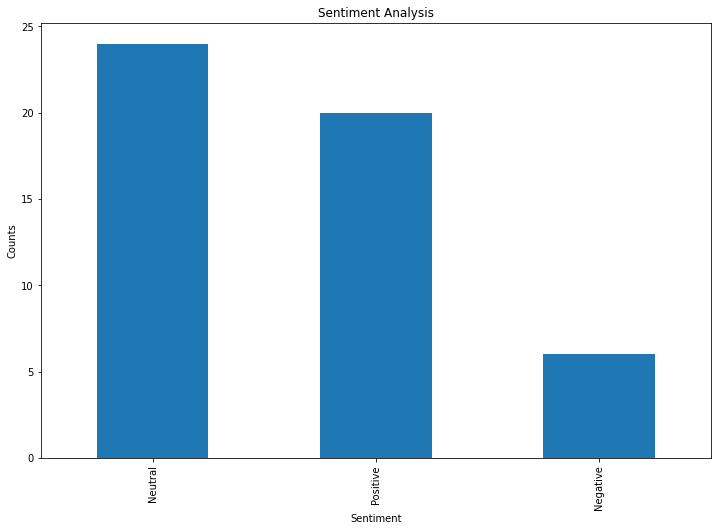

In [136]:
#visualise positive, negative, neutral tweets using Matplotlib.
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

#plt.bar(labels, values)

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Score'].value_counts().plot(kind = 'bar')
plt.show()

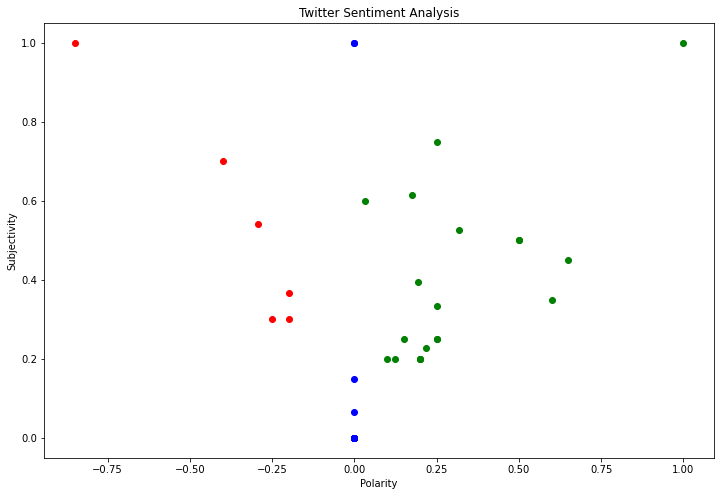

In [137]:
#visualise polarity and subjectivity using scatter plot.
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [138]:
#calculate the percentage of objective tweets.
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

40.0 % of objective tweets


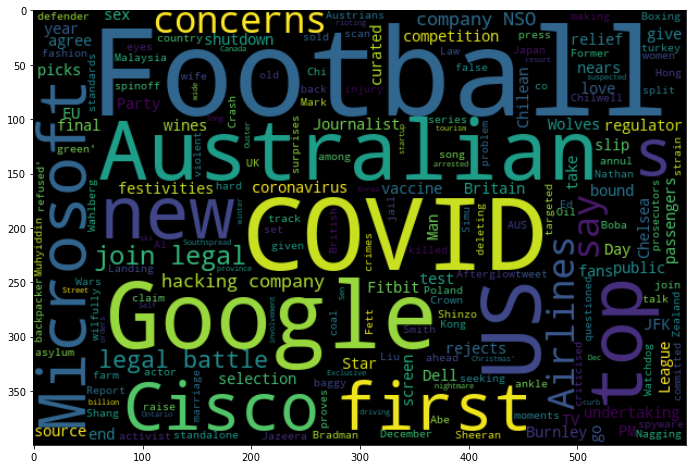

In [139]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.show()